In [1]:
#full import
import statsmodels.api as sm
import seaborn as sns
import seaborn as sb
import plotly.graph_objs as go
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
#from ggplot import *
from sklearn.metrics import roc_curve, auc
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_boston
from scipy import stats
from patsy import dmatrices
from matplotlib import pylab
from math import comb
from IPython.display import display
%matplotlib inline


In [2]:
path = r'E:\career\Dataa\udacity\Advanced Data Analysis Nanodegree Program\Data files'
os.chdir(path)

# 03.Univariate Exploration of Data Videos

## Bar Charts
A bar chart is used to depict the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level. A basic bar chart of frequencies can be created through the use of seaborn's countplot function:
```python
sb.countplot(data = df, x = 'cat_var')
```


In [3]:
pk = pd.read_csv('pokemon.csv')
print(pk.shape)
pk.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


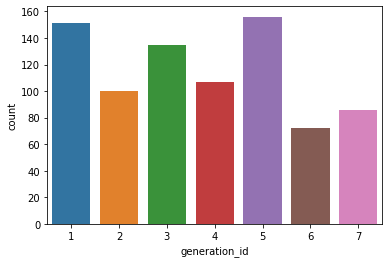

In [97]:

sb.countplot(data = pk, x = 'generation_id');
#one color better


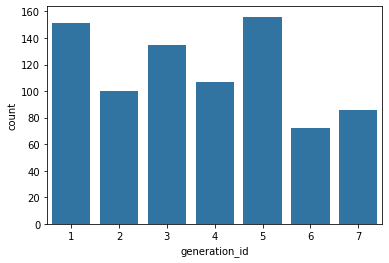

In [98]:
base_color = sb.color_palette()[0]
sb.countplot(data =pk, x = 'generation_id', color = base_color);

In [7]:
#sort gen by order of No poke series that were introduced 
#use order in countplot function

In [ ]:
#pk['generation_id'].value_counts() to creat the order 
#        to get the bar order >>> index
#store them in variable

In [148]:
# def percentage_blocks(df, var):
#     """
#     Take as input a dataframe and variable, and return a Pandas series with
#     approximate percentage values for filling out a waffle plot.
#     """
#     # compute base quotas
#     percentages = 100 * df[var].value_counts() / df.shape[0]
#     counts = np.floor(percentages).astype(int) # integer part = minimum quota
#     decimal = (percentages - counts).sort_values(ascending = False)

#     # add in additional counts to reach 100
#     rem = 100 - counts.sum()
#     for cat in decimal.index[:rem]:
#         counts[cat] += 1

#     return counts

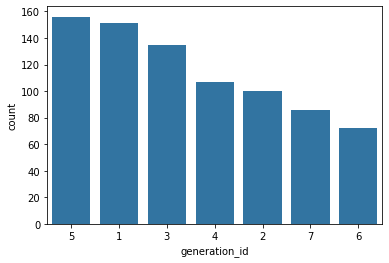

In [32]:
cat_order = pk['generation_id'].value_counts().index
sb.countplot(data = pk, x = 'generation_id', color = base_color, order = cat_order);

In [33]:
cat_order

Int64Index([5, 1, 3, 4, 2, 7, 6], dtype='int64')

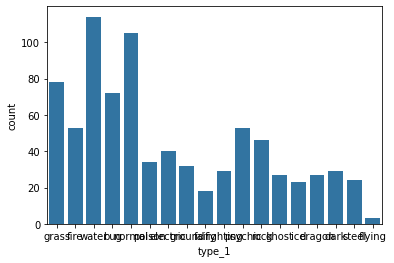

In [10]:
sb.countplot(data =pk, x = 'type_1', color = base_color);

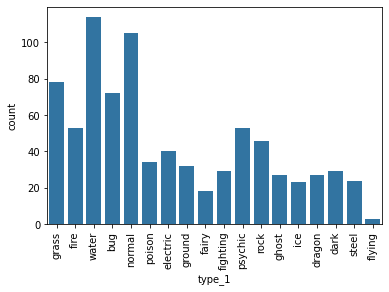

In [34]:
#rotation of label
#
sb.countplot(data =pk, x = 'type_1', color = base_color);
plt.xticks(rotation = 90);

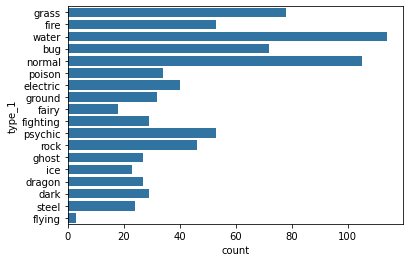

In [35]:
# h barchart X > Y
sb.countplot(data =pk, y = 'type_1', color = base_color);


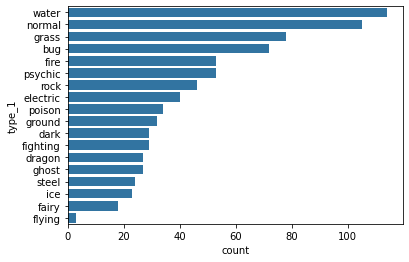

In [36]:
type_order = pk['type_1'].value_counts().index
sb.countplot(data =pk, y = 'type_1', color = base_color, order = type_order);

## Absolute vs. Relative Frequency



it's proportional contivutes to the all

In [37]:
pk_types = pk.melt( id_vars = ['id', 'species'],
                   value_vars = ['type_1', 'type_2'],
                   var_name = 'levels', value_name = 'type').dropna()

In [38]:
pk_types[802:812]

,id,species,levels,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


In [96]:
#types order by freq
type_count = pk_types['type'].value_counts()
type_order = pk_types['type'].value_counts().index
type_count

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

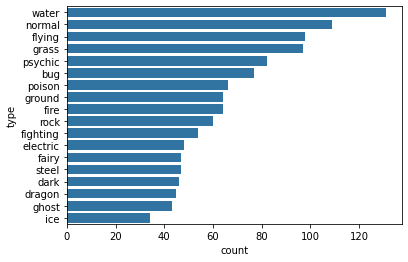

In [40]:
sb.countplot(data =pk_types, y = 'type', color = base_color, order = type_order);

### get proportion taken by most common group for derivation
1. computing the length of the longest bar in terms of proportion.
2. pk.shape[0] >> denominator 
3. .value_counts() >> numerator.
4. NumPy's a range function, to produce a set of evenly spaced proportioned values
5. between zero and the max in steps of 2%,
6. and store the values in the tick props variable.
7. list comprehension tick names > tick lables
##### Since the counts are still an absolute value, we need to multiply tick props by the number of Pokemon to get their position correct.

In [86]:
def relative_Values(df, step , c , orginaldf = 0 , r_x = 0 , h = 0 , r_y = 0):
    c = str(c)
    try:
        n_points = originaldf.shape[0]
    except:
        n_points = df.shape[0]
    max_count =  df[c].value_counts()[0]
    max_prop = max_count / n_points
    # generate tick mark locations and names
    tick_props = np.arange(0, max_prop, step)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]
    base_color = sb.color_palette()[0]
    order = df[c].value_counts().index
    if h == 1:
        sb.countplot(data = df, y = c, color = base_color, order = order);
    else:
        sb.countplot(data = df, x = c, color = base_color, order = order);
    plt.xticks(rotation = r_x);
    plt.yticks(rotation = r_y);
    plt.xticks(tick_props * n_points, tick_names);
    plt.xlabel('proportion');

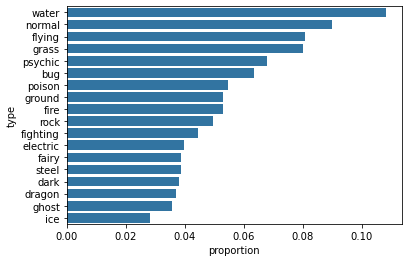

In [87]:
relative_Values(df = pk_types ,step = 0.02, c = 'type' , orginaldf = pk , h = 1 )

In [115]:
def relative_Values(df, c ,step = 0, orginaldf = 0 , r_x = 0 , h = 0 , r_y = 0):
    c = str(c)
    base_color = sb.color_palette()[0]

    #prepare for the relative
    if step >0:
        try:
            n_points = originaldf.shape[0]
        except:
            n_points = df.shape[0]
        max_count =  df[c].value_counts()[0]
        max_prop = max_count / n_points
        # generate tick mark locations and names
        tick_props = np.arange(0, max_prop, step)
        tick_names = ['{:0.2f}'.format(v) for v in tick_props]
    else:
        pass

    #order
    order = df[c].value_counts().index

    #normal plot
    if h == 1:
        sb.countplot(data = df, y = c, color = base_color, order = order);
    else:
        sb.countplot(data = df, x = c, color = base_color, order = order);
    plt.xticks(rotation = r_x);
    plt.yticks(rotation = r_y);

    #addons for the relative
    if step >0:
        plt.xticks(tick_props * n_points, tick_names);
        plt.xlabel('proportion');
    else:
        pass

In [112]:
def orderedhisto(df,c, r_x = 0 , h = 0 , r_y = 0):
    #must be there
    base_color = sb.color_palette()[0]
    c = str(c)


    #order
    order = df[c].value_counts().index

    #normal plot
    if h == 1:
        sb.countplot(data = df, y = c, color = base_color, order = order);
    else:
        sb.countplot(data = df, x = c, color = base_color, order = order);
    plt.xticks(rotation = r_x);
    plt.yticks(rotation = r_y);

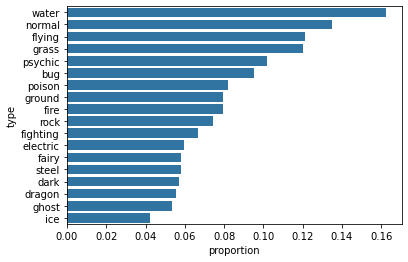

In [91]:
n_points = pk.shape[0]
max_count =  pk_types['type'].value_counts()[0]
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = pk_types, y = 'type', color = base_color, order = type_order);
plt.xticks(tick_props * n_points, tick_names);
plt.xlabel('proportion');

In [132]:
def univar_bar(df, c ,prop = 0 , relative = 0, orginaldf = 0 , r_x = 0 , h = 0 , r_y = 0):
    #req steps
    c = str(c)
    base_color = sb.color_palette()[0]

    #prepare for the relative
    try:
        n_points = originaldf.shape[0]
    except:
        n_points = df.shape[0]
    #do relative
    if relative == 1:         
        max_count =  df[c].value_counts()[0]
        max_prop = max_count / n_points
        # generate tick mark locations and names
        tick_props = np.arange(0, max_prop, .02)
        tick_names = ['{:0.2f}'.format(v) for v in tick_props]
    else:
        pass

    #count and order 
    
    count = df[c].value_counts()
    order = df[c].value_counts().index
    
    #add proportion 
    if prop == 1:
        for i in range(count.shape[0]):
            counts = count[i]
            pct_string = '{:0.1f}%'.format(100*counts/n_points) 
            plt.text(counts+1 , i,  pct_string , va = 'center');    
    else:
        pass
 

    #normal plot
    if h == 1:
        sb.countplot(data = df, y = c, color = base_color, order = order);
    else:
        sb.countplot(data = df, x = c, color = base_color, order = order);
    plt.xticks(rotation = r_x);
    plt.yticks(rotation = r_y);

    #addons for the relative
    if relative == 1:
        plt.xticks(tick_props * n_points, tick_names);
        plt.xlabel('proportion');
    else:
        pass

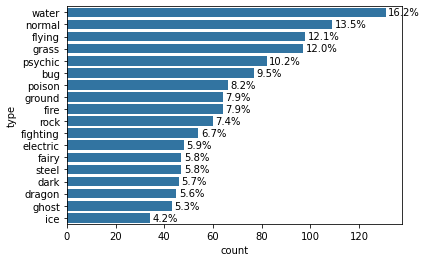

In [133]:
univar_bar(df =pk_types , c = 'type' ,prop = 1 ,relative = 0, orginaldf = pk , r_x = 0 , h = 1 , r_y = 0)

## Additional Variation


Alternatively, maybe we want to have the axes in terms of counts, and use text on the bars to show proportion.
This is where the flexibility of Matplotlib can shine.
We use a loop to place text elements one by one.
The first argument to the text function is the X position,
just after the end of the bar.
The second argument is the Y position,
which starts at zero and increments with the loop.
The third argument is the string to be printed, the percentage.
Finally, I'm going to add an optional parameter VA
to center the vertical alignment of text on each bar.
The final plot looks like this.


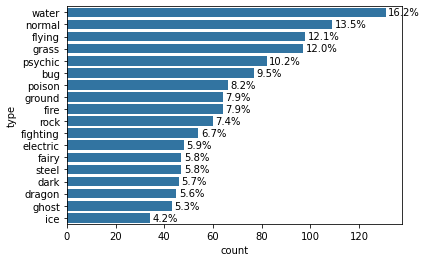

In [82]:
#types order by freq
type_count = pk_types['type'].value_counts()       #count
type_order = pk_types['type'].value_counts().index #order
type_count


# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = pk_types, y = 'type', color = base_color, order = type_order);


for i in range(type_count.shape[0]):
    count = type_count[i]
    pct_string = '{:0.1f}%'.format(100*count/n_points) 
    plt.text(count+1 , i,  pct_string , va = 'center');

for i in range(count.shape[0]):
    counts = count[i]
    pct_string = '{:0.1f}%'.format(100*counts/n_points) 
    plt.text(counts+1 , i,  pct_string , va = 'center');    
    

# # add annotations
# n_points = pk.shape[0]
# counts =  pk_types['type'].value_counts()
# locs, labels = plt.xticks() # get the current tick locations and labels

# # loop through each pair of locations and labels
# for loc, label in zip(locs, labels):

#     # get the text property for the label to get the correct count
#     count = counts[label.get_text()]
#     pct_string = '{:0.1f}%'.format(100*count/n_points)

#     # print the annotation just below the top of the bar
#     plt.text(loc, count-8, pct_string, ha = 'center', color = 'w')

#### Counting Missing Data
One interesting way we can apply bar charts is through the visualization of missing data. We can use pandas functions to create a table with the number of missing values in each column.
```
df.isna().sum()
```
What if we want to visualize these missing value counts? We could treat the variable names as levels of a categorical variable, and create a resulting bar plot. However, since the data is not in its tidy, unsummarized form, we need to make use of a different plotting function. Seaborn's barplot function is built to depict a summary of one quantitative variable against levels of a second, qualitative variable, but can be used here.
```
na_counts = df.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color = base_color)
```
The first argument to the function contains the x-values (column names), the second argument the y-values (our counts).

![title](https://video.udacity-data.com/topher/2018/March/5aaabf07_l3-c05-missingdata2/l3-c05-missingdata2.png)

As a general note, this is a useful function to keep in mind if your data is summarized and you still want to build a bar chart. If your data is not yet summarized, however, just use the countplot function so that you don't need to do extra summarization work. In addition, you'll see what barplot's main purpose is in the next lesson, when we discuss adaptations of univariate plots for plotting bivariate data.




In [156]:
def countna(df,r_x = 0 , h = 0 , r_y = 0):
    na_counts = df.isna().sum()
    count = na_counts.value_counts()
    order = na_counts.value_counts().index
    base_color = sb.color_palette()[0]
    if h == 1:
        sb.barplot(y = na_counts.index.values, x = na_counts, color = base_color, order = order)
    else:
        sb.barplot(x = na_counts.index.values, y = na_counts, color = base_color, order = order)
    plt.xticks(rotation = r_x);
    plt.yticks(rotation = r_y);

In [182]:
na_counts = pk.isna().sum()
type(na_counts)

pandas.core.series.Series

In [193]:
na_counts = pk.isna().sum()
na_counts.sort_values(ascending= False, inplace = True)
na_counts

type_2             402
special-defense      0
special-attack       0
speed                0
defense              0
attack               0
hp                   0
type_1               0
base_experience      0
weight               0
height               0
generation_id        0
species              0
id                   0
dtype: int64

In [194]:
na_counts = pk.isna().sum()
na_counts

id                   0
species              0
generation_id        0
height               0
weight               0
base_experience      0
type_1               0
type_2             402
hp                   0
attack               0
defense              0
speed                0
special-attack       0
special-defense      0
dtype: int64

In [195]:
def countna(df,r_x = 0 , h = 0 , r_y = 0):
    na_counts = pk.isna().sum()
    na_counts.sort_values(ascending= False, inplace = True)
    base_color = sb.color_palette()[0]
    if h == 1:
        sb.barplot(y = na_counts.index.values, x = na_counts, color = base_color)
    else:
        sb.barplot(x = na_counts.index.values, y = na_counts, color = base_color)
    plt.xticks(rotation = r_x);
    plt.yticks(rotation = r_y);

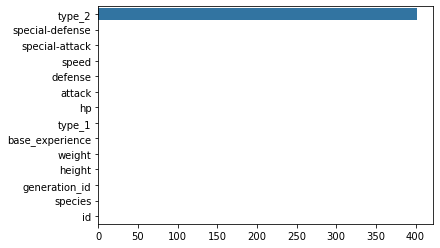

In [197]:
countna(pk, h = 1)

Task 1: There have been quite a few Pokémon introduced over the series' history. How many were introduced in each generation? Create a bar chart of these frequencies using the 'generation_id' column.

<AxesSubplot:xlabel='generation_id', ylabel='count'>

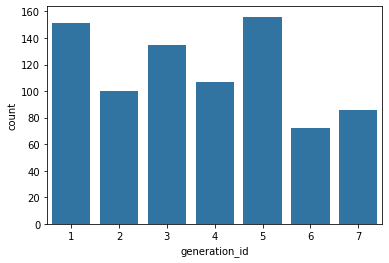

In [83]:
sb.countplot(data =pk, x = 'generation_id', color = base_color)

# pie chart


In [209]:
def piechart(df,c ,donat = 1 ):
    '''donat from 0 to 1'''
    sorted_counts = df[c].value_counts()
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : donat});
    plt.axis('square')

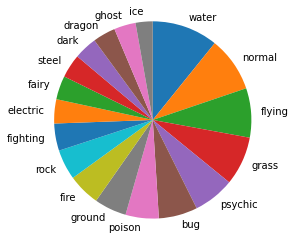

In [213]:
piechart(pk_types , 'type')

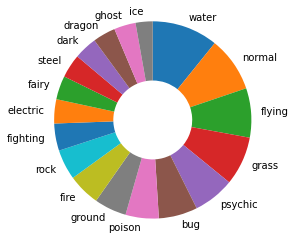

In [214]:
piechart(pk_types , 'type', .6)

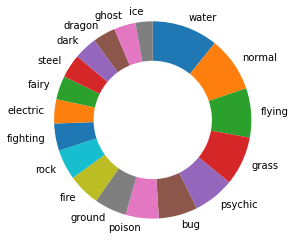

In [215]:
piechart(pk_types , 'type', .4)

## histogram

The size of the bins can have a major effect on how you interpret the data.

If your bin size is too large,
then you may end up losing a lot of information about the overall distribution of data.

On the opposite side, a too small bin size can
introduce noise that can distract from the main trends in your data.

When creating a histogram,
it's a good idea to play around with different settings for the bin sizes and
boundary points to achieve a good understanding of the plotted variable.

In [306]:
def histogram(df, c , step = 0 , method = 0 ):
    if step > 0:
        bins = np.arange(df[c].min()-step, df[c].max()+step , step);
        plt.hist(data = df, x = c, bins = bins);
        plt.title(label = (c + ' With bin each ' + str(step)) )
    else:
        plt.hist(data = df, x = c, bins = method);
        plt.title(label = (c + ' With bin method= ' + method) )

def histtest(df, c):
    v = ['auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', 'sqrt' , 10 , 50]
    i = 1
    plt.figure(figsize = [15, 25])
    for b in v:
        #print(b)
        plt.subplot(5, 2, i) # 1 row, 2 cols, subplot 1
        plt.hist(df, x = c, bins = b);
        plt.title(b)
        i += 1

The fact that bin edges are **non integer** and the data values are **integer**, will mean that some bins cover more integer values than others.

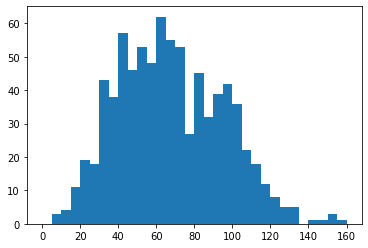

In [303]:
#specefy min to max step arange doendt inclue max 
#Here, I'll make use of Numpy's arange function to create bins of size five
# +5 This is because the values generated by arange will not include the maximum value.
bins = np.arange(0, pk['speed'].max()+5 , 5);
plt.hist(data = pk, x = 'speed', bins = bins);

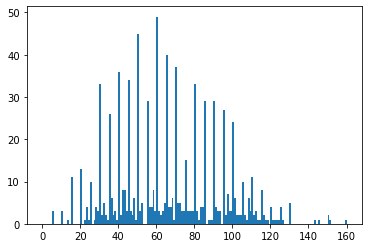

In [304]:
#specefy min to max step arange doendt inclue max 
bins = np.arange(0, pk['speed'].max()+1 , 1);
plt.hist(data = pk, x = 'speed', bins = bins);

Seaborn also has a function for creating histograms, Distplot.
Unlike the countplot and Hist function seen before, the main argument taken by the function is just the panda series containing all the data.

First of all, the default bin count is larger than in matplotlib.

Secondly, you'll notice that a **line** has been plotted over the bars and that the **Y axis** values are **very small**.
This is because the **line is a density curve** estimate of the data distribution,
and the total area underneath the curve is set to be =1.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


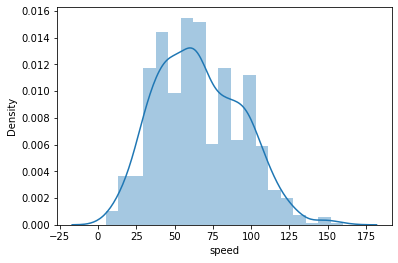

In [307]:
sb.distplot(pk['speed']);
#distriution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


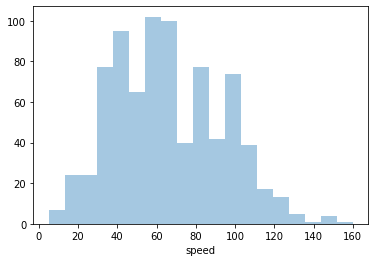

In [308]:
sb.distplot(pk['speed'] , kde = False); #matplot hist 

**Task**: Pokémon have a number of different statistics that describe their combat capabilities. Here, 

create a _histogram_ that depicts the distribution of 'special-defense' values taken. **Hint**: Try playing around with different bin width sizes to see what best depicts the data.

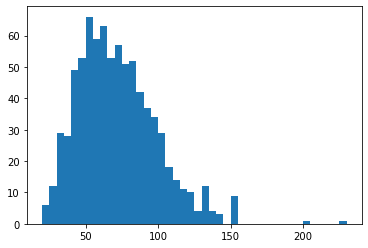

In [309]:
#specefy min to max step arange doendt inclue max 
bins = np.arange(20, pk['special-defense'].max()+5, 5);
plt.hist(pk['special-defense'], bins = bins);

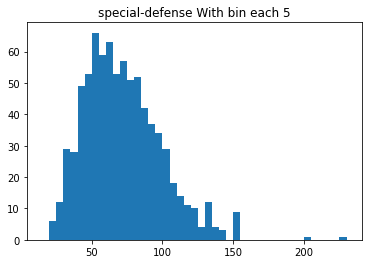

In [310]:
histogram(pk, "special-defense", step = 5)

# basic plot tips 

At this point, you've seen and had some practice with some basic plotting functions using matplotlib and seaborn.

The previous page introduced something a little bit new: creating two side-by-side plots through the use of matplotlib's [subplot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function. 
If you have any questions about how that or the [figure()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html) function worked, then read on. 

This page will discuss the basic structure of visualizations using matplotlib and how subplots work in that structure.

The base of a visualization in matplotlib is a **Figure object**. 

Contained within each **Figure** will be **one or more Axes objects**, 

each **Axes object** containing a number of other **elements** that represent each plot. 

In the earliest examples, these objects have been created **implicitly**. Let's say that the following expression is run inside a Jupyter notebook to create a histogram:
```py
plt.hist(data = df, x = 'num_var')
```
Since we don't have a **Figure area** to plot inside, Python first creates a **Figure object**. 

And since the Figure **doesn't start with any Axes** to draw the histogram onto, an Axes object is created **inside the Figure**. Finally, the histogram is drawn within that Axes.
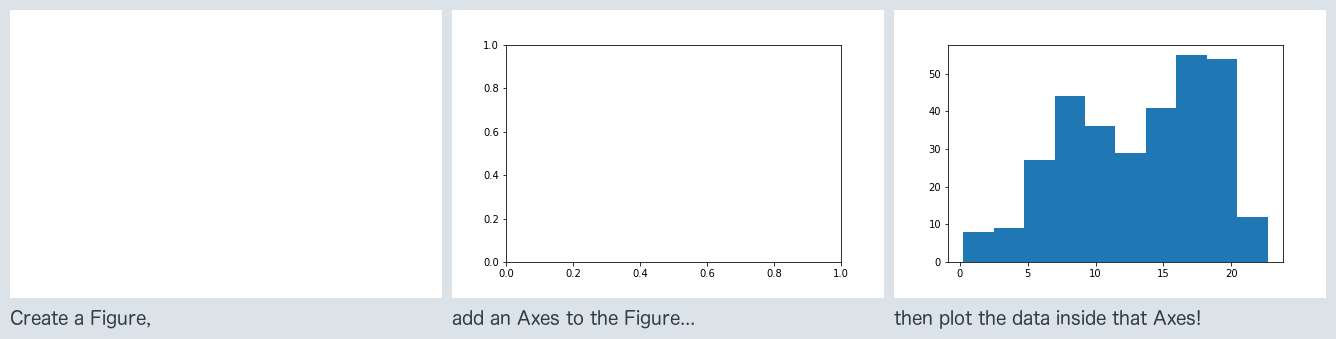

One **alternative** way we could have created the histogram is to **explicitly** set up the **Figure** and **Axes** like this:
```py
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data = df, x = 'num_var')
```
figure() creates a new Figure object, a reference to which has been stored in the variable fig. 

One of the Figure **methods** is .add_axes(), which creates a new Axes object in the Figure. 

The method requires one list as argument specifying the **dimensions** of the Axes: 
the **first two** elements of the list indicate the **position of the lower-left hand corner** of the Axes (in this case one quarter of the way from the lower-left corner of the Figure) and 

the **last two** elements specifying the Axes **width and height**, respectively. We refer to the Axes in the variable **ax**. Finally, we use the Axes method **.hist()** just like we did before with **plt.hist().**
```py
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'cat_var', color = base_color, ax = ax)
```

In the above two cases, there was **no purpose to explicitly** go through the Figure and **Axes creation** steps. 

And indeed, in most cases, you can just use the basic matplotlib and seaborn functions as is. 

**Each** function **targets** a **Figure** or Axes, and they'll automatically target the **most recent Figure** or Axes worked with. 

As an example of this, let's review in detail how **subplot()** was used on the Histograms page

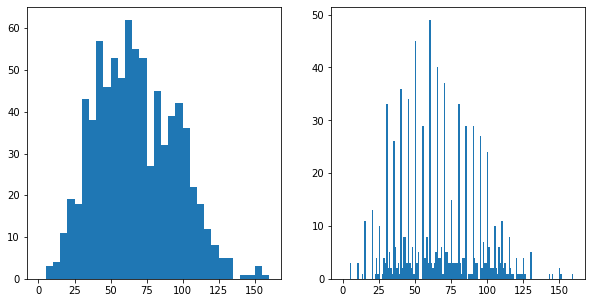

In [90]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bins = np.arange(0, pk['speed'].max()+5 , 5);
plt.hist(data = pk, x = 'speed', bins = bins);

# example of somewhat too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pk['speed'].max()+1 , 1);
plt.hist(data = pk, x = 'speed', bins = bins);

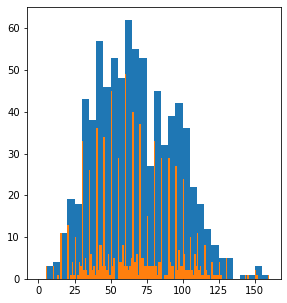

In [150]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bins = np.arange(0, pk['speed'].max()+5 , 5);
plt.hist(data = pk, x = 'speed', bins = bins);

# example of somewhat too-small bin size
#plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pk['speed'].max()+1 , 1);
plt.hist(data = pk, x = 'speed', bins = bins);

We would see two sets of bars, plotted one on top of the other.

We would see one set of axes, occupying the left side of the figure.



### Additional Techniques


If you don't assign Axes objects as they're created, you can **retrieve** the current Axes using ```ax = plt.gca()```, or you can get a **list** of all Axes in a Figure fig by using ```axes = fig.get_axes()```. As for **creating subplots**, you can use ```fig.add_subplot()``` in the same way as ```plt.subplot()``` above. If you already know that you're going to be creating a bunch of subplots, you can use the ```plt.subplots()``` function:

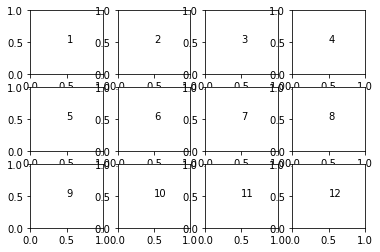

In [317]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

In [315]:
axes

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

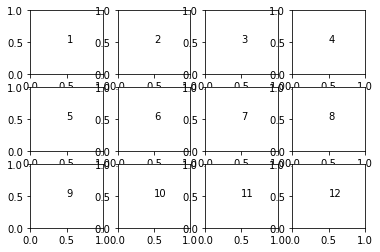

In [92]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

more on 
[Subplots](https://classroom.udacity.com/nanodegrees/nd002-mena-nfp3/parts/211104e3-a5bc-4247-87b7-06bfa757806c/modules/884648ee-be0a-4bde-853f-26e97458edc8/lessons/b86503df-e416-4f0e-9e2d-a7a3c08d0bc3/concepts/83335e78-7d71-423b-84a9-f47cdf64c0f9)

# Choosing a Plot for Discrete Data


In [93]:
a = np.random.randint(1,6,100)

In [94]:
len(a)

100

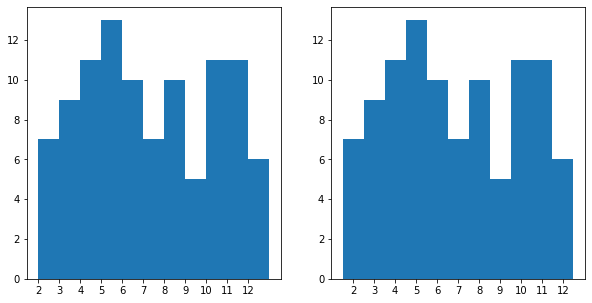

In [320]:
die_rolls = np.random.randint(2,13,100)
plt.figure(figsize = [10, 5]);

# histogram on the left, bin edges on integers
plt.subplot(1, 2, 1);
bin_edges = np.arange(2, 12+1.1, 1); # note `+1.1`, see below
plt.hist(die_rolls, bins = bin_edges);
plt.xticks(np.arange(2, 12+1, 1));

# histogram on the right, bin edges between integers
plt.subplot(1, 2, 2)
bin_edges = np.arange(1.5, 12.5+1, 1);
plt.hist(die_rolls, bins = bin_edges);
plt.xticks(np.arange(2, 12+1, 1));

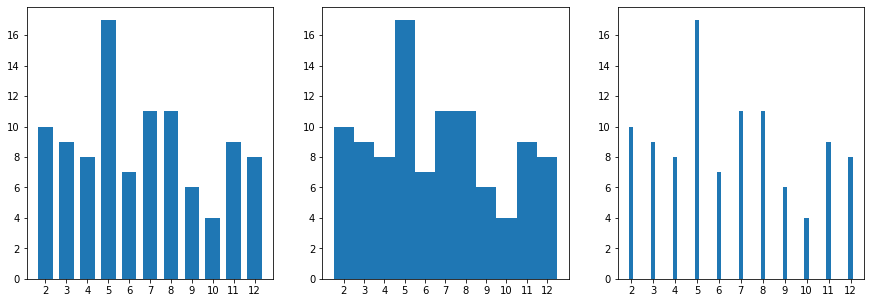

In [328]:
# see what happens when changhe the rwidth 
#it make some area to see the steps 

die_rolls = np.random.randint(2,13,100)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(die_rolls, bins = bin_edges, rwidth = .7)
plt.xticks(np.arange(2, 12+1, 1));
plt.subplot(1,3,2)
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(die_rolls, bins = bin_edges, rwidth = 1)
plt.xticks(np.arange(2, 12+1, 1));
plt.subplot(1,3,3)
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(die_rolls, bins = bin_edges, rwidth = .2)
plt.xticks(np.arange(2, 12+1, 1));

# Descriptive Statistics, Outliers and Axis Limits


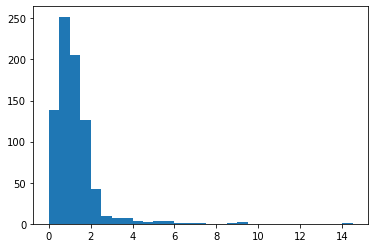

In [99]:
bins = np.arange(0, pk['height'].max()+0.5 , 0.5);
plt.hist(data = pk, x = 'height', bins = bins);

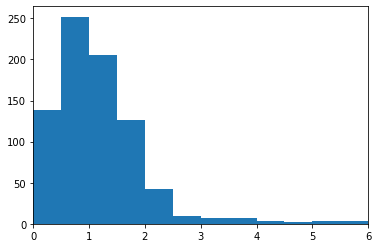

In [100]:
#we can use x lim to limit 
bins = np.arange(0, pk['height'].max()+0.5 , 0.5);
plt.hist(data = pk, x = 'height', bins = bins);
plt.xlim((0,6));

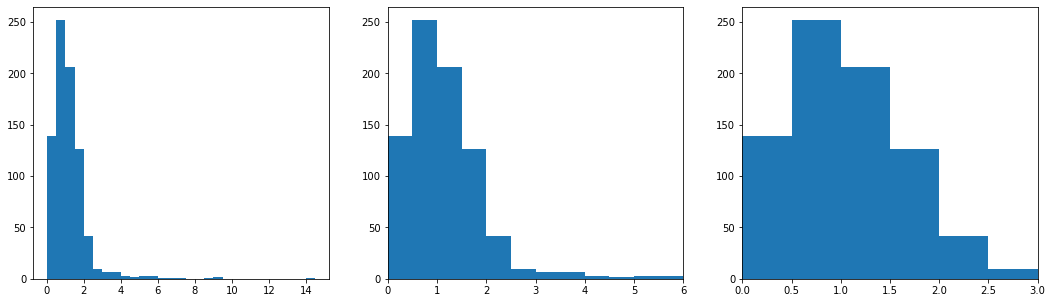

In [330]:
plt.figure(figsize = [18, 5])

# histogram on left: full data
plt.subplot(1, 3, 1)
bins = np.arange(0, pk['height'].max()+0.5 , 0.5);
plt.hist(data = pk, x = 'height', bins = bins);
plt.subplot(1, 3, 2)
bins = np.arange(0, pk['height'].max()+0.5 , 0.5);
plt.hist(data = pk, x = 'height', bins = bins);
plt.xlim((0,6));
plt.subplot(1, 3, 3)
bins = np.arange(0, pk['height'].max()+0.5 , 0.5);
plt.hist(data = pk, x = 'height', bins = bins);
plt.xlim((0,3));

# scale 
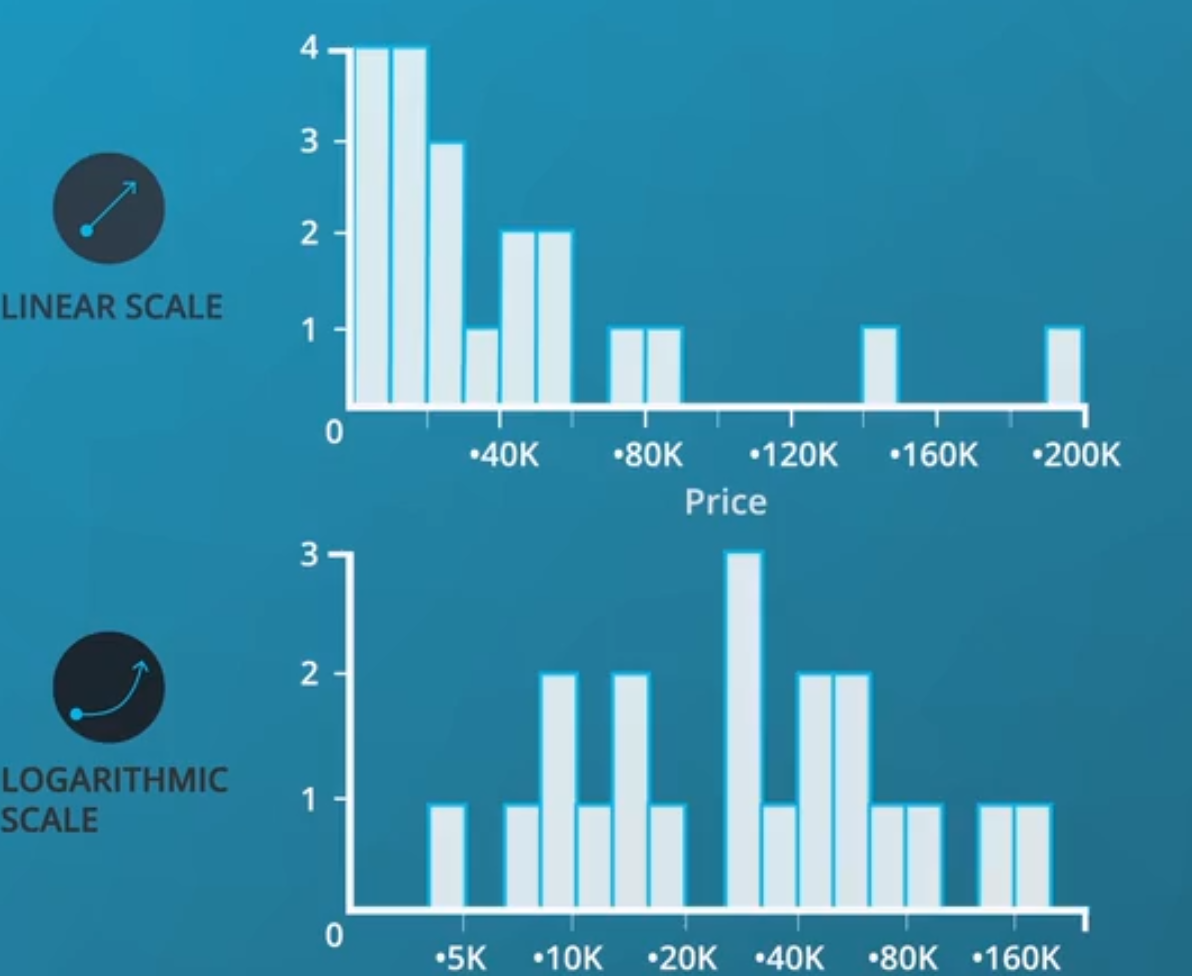

# Scales and Transformations
Certain data distributions will find themselves amenable to scale transformations. The most common example of this is data that follows an approximately **log-normal distribution**. This is data that, in their **natural units**, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a **logarithmic** transform to the data, the data will follow a **normal distribution**. (If you need a refresher on the logarithm function, check out this lesson on Khan Academy.)



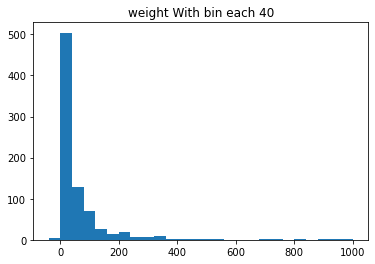

In [331]:
histogram(pk , "weight", 40)

In [146]:
np.log10(pk['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

In [147]:
pk['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

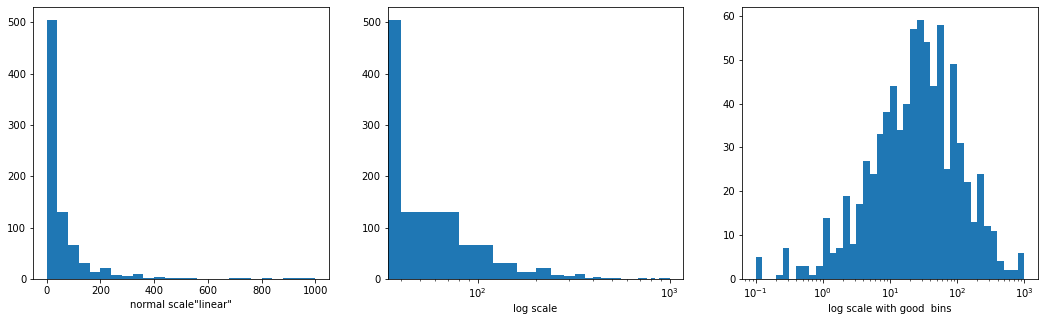

In [334]:
plt.figure(figsize = [18, 5])



# histogram on left: full data
plt.subplot(1, 3, 1)
bins = np.arange(0, pk['weight'].max()+40 , 40);
plt.hist(data = pk, x = 'weight', bins = bins);
plt.xlabel('normal scale"linear"');

plt.subplot(1, 3, 2)
plt.hist(data = pk, x = 'weight', bins = bins);
plt.xscale('log');
plt.xlabel('log scale');

#it's odd loking plot 

#adjut bins
plt.subplot(1, 3, 3)
maxs = np.log10(pk['weight'].describe()).max()
mins = np.log10(pk['weight'].describe()).min()
steps = .1
bins = 10 ** np.arange(mins, maxs+steps , steps);
plt.hist(data = pk, x = 'weight', bins = bins);
plt.xscale('log');
plt.xlabel('log scale with good  bins');

In [335]:
# we can add more 
ticks = [.1,.3, 1,3, 10,30, 100,300, 1000]
labels = ['{}'.format(i) for i in ticks]

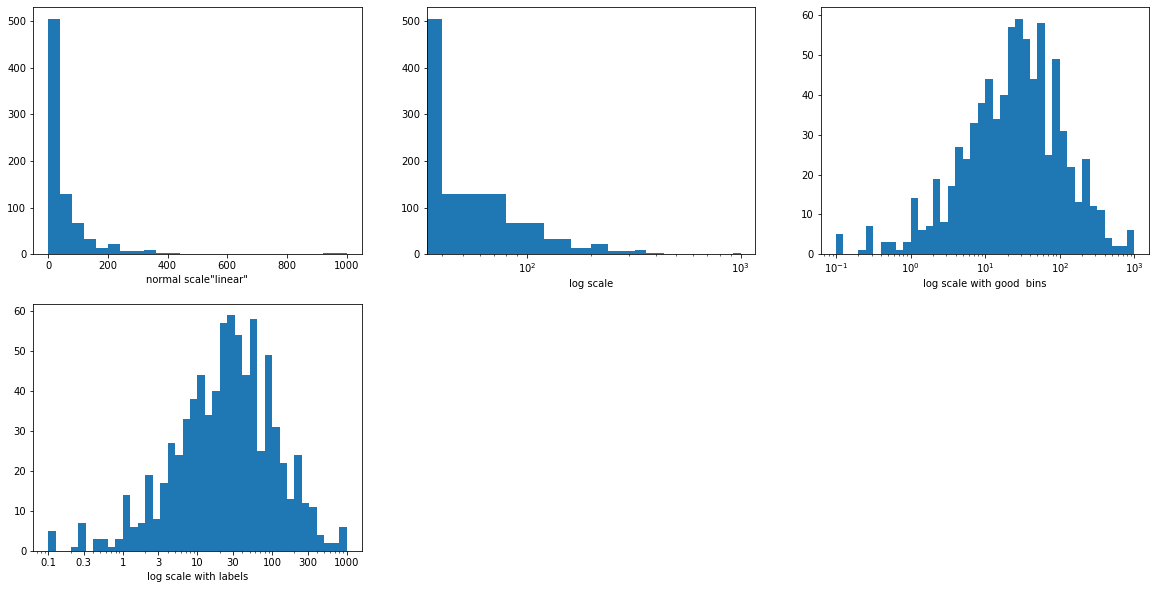

In [336]:



plt.figure(figsize = [18, 10])

# histogram on left: full data
bins = np.arange(0, pk['weight'].max()+40 , 40);
plt.subplot(2, 3, 1)
plt.hist(data = pk, x = 'weight', bins = bins);
plt.xlabel('normal scale"linear"');

plt.subplot(2, 3, 2)
plt.hist(data = pk, x = 'weight', bins = bins);
plt.xscale('log');
plt.xlabel('log scale');


plt.subplot(2, 3, 3)
maxs = np.log10(pk['weight'].describe()).max()
mins = np.log10(pk['weight'].describe()).min()
steps = .1
bins = 10 ** np.arange(mins, maxs+steps , steps);
plt.hist(data = pk, x = 'weight', bins = bins);
plt.xscale('log');
plt.xlabel('log scale with good  bins');




plt.subplot(2,3,4)
maxs = np.log10(pk['weight'].describe()).max()
mins = np.log10(pk['weight'].describe()).min()
steps = .1
bins = 10 ** np.arange(mins, maxs+steps , steps);
ticks = [.1,.3, 1,3, 10,30, 100,300, 1000]
labels = ['{}'.format(i) for i in ticks]
plt.hist(data = pk, x = 'weight', bins = bins);
plt.xscale('log');
plt.xlabel('log scale with labels');
plt.xticks(ticks, labels);

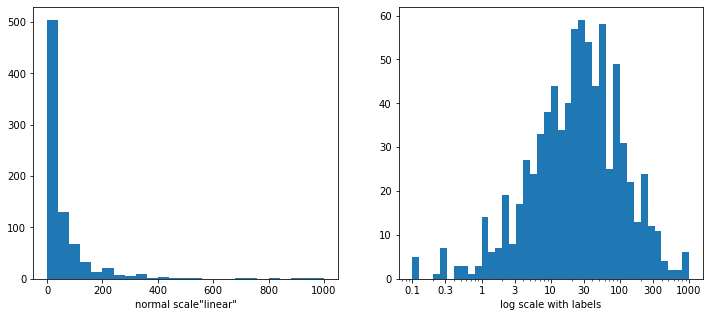

In [339]:
# histogram on left: full data
plt.figure(figsize = [12, 5])

plt.subplot(1, 2, 1)
bins = np.arange(0, pk['weight'].max()+40 , 40);
plt.hist(data = pk, x = 'weight', bins = bins);
plt.xlabel('normal scale"linear"');


plt.subplot(1,2,2)
maxs = np.log10(pk['weight'].describe()).max()
mins = np.log10(pk['weight'].describe()).min()
steps = .1
bins = 10 ** np.arange(mins, maxs+steps , steps);
ticks = [.1,.3, 1,3, 10,30, 100,300, 1000]
labels = ['{}'.format(i) for i in ticks]
plt.hist(data = pk, x = 'weight', bins = bins);
plt.xscale('log');
plt.xlabel('log scale with labels');
plt.xticks(ticks, labels);

In [342]:
def logscaller(df,c,step):
    maxs = np.log10(df[c].describe()).max()
    mins = np.log10(pk[c].describe()).min()
    bins = 10 ** np.arange(mins, maxs+step , step);
    ticks = [.1,.3, 1,3, 10,30, 100,300, 1000]
    labels = ['{}'.format(i) for i in ticks]
    plt.hist(data = df, x = c, bins = bins);
    plt.xscale('log');
    plt.xlabel(xlabel = (c + ' in log scale'));
    plt.xticks(ticks, labels);
    

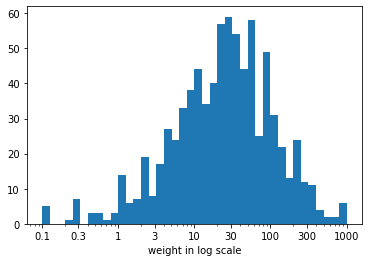

In [343]:
logscaller(pk, 'weight', .1)

In [356]:
def sqrtscaller(df,c,step):
    def sqrt_trans(x, inverse = False):
        """ transformation helper function """
        if not inverse:
            return np.sqrt(x)
        else:
            return x ** 2
    data = df[c]
    bin_edges = np.arange(sqrt_trans(data.min())-step, sqrt_trans(data.max())+step, step)
    plt.hist(data.apply(sqrt_trans), bins = bin_edges);
    tick_locs = np.arange(0, sqrt_trans(data.max())+(step *10), (step *10))
    plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int))

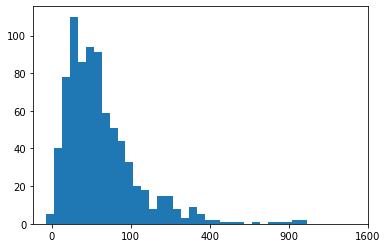

In [357]:
sqrtscaller(pk, 'weight', 1)

### Scales_and_Transformations_Practice

In [359]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task 1**: There are also variables in the dataset that don't have anything to do with the game mechanics, and are just there for flavor. Try plotting the distribution of Pokémon heights (given in meters). For this exercise, experiment with different axis limits as well as bin widths to see what gives the clearest view of the data.

(0.0, 4.0)

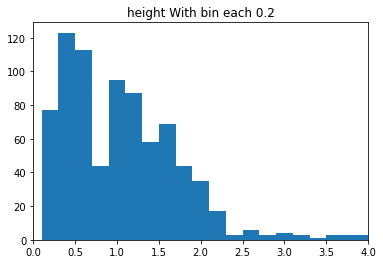

In [371]:
histogram(pokemon, "height", .2)
plt.xlim((0,4));

There's a very long tail of Pokemon heights. Here, I've focused in on Pokemon of height 6 meters or less, so that I can use a smaller bin size to get a more detailed look at the main data distribution.


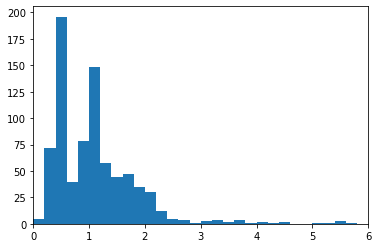

In [372]:
sol_string = ["There's a very long tail of Pokemon heights. Here, I've",
              "focused in on Pokemon of height 6 meters or less, so that I",
              "can use a smaller bin size to get a more detailed look at",
              "the main data distribution."]
print((" ").join(sol_string))

# data setup
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bins)
plt.xlim((0,6));

**Task 2**: In this task, you should plot the distribution of Pokémon weights (given in kilograms). Due to the very large range of values taken, you will probably want to perform an _axis transformation_ as part of your visualization workflow.

In [378]:
def scales_solution_2():
    """
    Solution for Question 2 in scales and transformation practice: create a
    histogram of Pokemon weights.
    """
    sol_string = ["Since Pokemon weights are so skewed, I used a log transformation",
                  "on the x-axis. Bin edges are in increments of 0.1 powers of ten,",
                  "with custom tick marks to demonstrate the log scaling."]
    print((" ").join(sol_string))

    # data setup
    

    bins = 10 ** np.arange(-1, 3.0+0.1, 0.1)
    ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
    labels = ['{}'.format(val) for val in ticks]

    plt.hist(data = pokemon, x = 'weight', bins = bins)
    plt.xscale('log')
    plt.xticks(ticks, labels)
    plt.xlabel('Weight (kg)')

In [381]:
histogram?


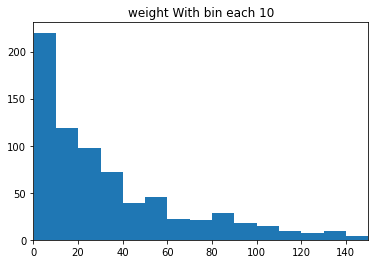

In [391]:
histogram(pokemon, "weight", step= 10)
plt.xlim((0,150));

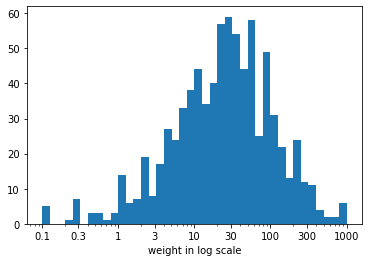

In [376]:
logscaller(pokemon, "weight", .1)

Since Pokemon weights are so skewed, I used a log transformation on the x-axis. Bin edges are in increments of 0.1 powers of ten, with custom tick marks to demonstrate the log scaling.


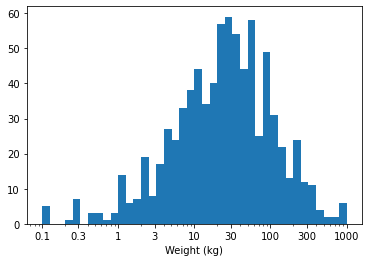

In [379]:
# run this cell to check your work against ours
scales_solution_2()